# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [29]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [30]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [31]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [32]:
# The monthly amount for the member's household income
# YOUR CODE HERE
income_monthly = 12000



#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [33]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [34]:
# Using the Python requests library, make an API call to access the current price of BTC


btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent = 4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18697650,
            "total_supply": 18697650,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 57584.0,
                    "volume_24h": 40376385267,
                    "market_cap": 1078113796572,
                    "percentage_change_1h": 0.674261272941845,
                    "percentage_change_24h": 0.29244082405908,
                    "percentage_change_7d": 17.5624782823113,
                    "percent_change_1h": 0.674261272941845,
                    "percent_change_24h": 0.29244082405908,
                    "percent_change_7d": 17.5624782823113
                }
            },
            "last_updated": 1620004700
        }
    },
    "metadata": {
        "timestamp": 1620004700,
        "num_crypto

In [35]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent = 4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115715237,
            "total_supply": 115715237,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2997.69,
                    "volume_24h": 37072370666,
                    "market_cap": 346855894572,
                    "percentage_change_1h": 0.160147114000422,
                    "percentage_change_24h": 2.08143784698321,
                    "percentage_change_7d": 29.9189183837449,
                    "percent_change_1h": 0.160147114000422,
                    "percent_change_24h": 2.08143784698321,
                    "percent_change_7d": 29.9189183837449
                }
            },
            "last_updated": 1620004769
        }
    },
    "metadata": {
        "timestamp": 1620004769,
        "num_cryp

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [36]:
# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response['data']['1']['quotes']['USD']['price']
# Print the current price of BTC
print(btc_price)
# YOUR CODE HERE


57584.0


In [37]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

print(eth_price)



2997.69


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [38]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
print(btc_value)

69100.8


In [39]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
print(eth_value)

15887.757


In [40]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(total_crypto_wallet)

84988.557


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [41]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [42]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [43]:


symbols = ["SPY", "AGG"]

# Set timeframe to 1D 
time_period = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-01-29").isoformat()
end_date = pd.Timestamp("2021-01-29").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [50]:
stock_price_df = alpaca.get_barset(
    symbols,
    time_period,
    start=start_date,
    end=end_date
).df
stock_price_df.head()


AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                              SPY                                        
                             open      high     low     close    volume  
time                                                                     
2020-12-07 00:00:00-05:00  369.02  369.6200  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.0500  365.95  366.8900  60700254  
2020-12-10 00:00:00-05:00  365.37  367.8600  364.43  366.7200  47851654  
2020-12-11 00:00:00-05:00  364.90  366.7402  363.26  366.2800  47917103

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [82]:

start_date = pd.Timestamp("2021-01-29", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-29", tz="America/New_York").isoformat()

agg_close_price = (stock_price_df["AGG"]["close"])

# Print the AGG closing price

print(agg_close_price)


time
2020-12-07 00:00:00-05:00    117.75
2020-12-08 00:00:00-05:00    117.77
2020-12-09 00:00:00-05:00    117.62
2020-12-10 00:00:00-05:00    117.88
2020-12-11 00:00:00-05:00    118.03
                              ...  
2021-04-26 00:00:00-04:00    114.65
2021-04-27 00:00:00-04:00    114.37
2021-04-28 00:00:00-04:00    114.44
2021-04-29 00:00:00-04:00    114.37
2021-04-30 00:00:00-04:00    114.50
Name: close, Length: 100, dtype: float64


In [83]:


spy_close_price = (stock_price_df["SPY"]["close"])
print(spy_close_price)


time
2020-12-07 00:00:00-05:00    369.1200
2020-12-08 00:00:00-05:00    370.1599
2020-12-09 00:00:00-05:00    366.8900
2020-12-10 00:00:00-05:00    366.7200
2020-12-11 00:00:00-05:00    366.2800
                               ...   
2021-04-26 00:00:00-04:00    417.6400
2021-04-27 00:00:00-04:00    417.4800
2021-04-28 00:00:00-04:00    417.3500
2021-04-29 00:00:00-04:00    419.9800
2021-04-30 00:00:00-04:00    417.3000
Name: close, Length: 100, dtype: float64


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [84]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares


spy_value = spy_close_price * spy_shares



In [85]:
print(spy_value,agg_value)

time
2020-12-07 00:00:00-05:00    40603.200
2020-12-08 00:00:00-05:00    40717.589
2020-12-09 00:00:00-05:00    40357.900
2020-12-10 00:00:00-05:00    40339.200
2020-12-11 00:00:00-05:00    40290.800
                               ...    
2021-04-26 00:00:00-04:00    45940.400
2021-04-27 00:00:00-04:00    45922.800
2021-04-28 00:00:00-04:00    45908.500
2021-04-29 00:00:00-04:00    46197.800
2021-04-30 00:00:00-04:00    45903.000
Name: close, Length: 100, dtype: float64 time
2020-12-07 00:00:00-05:00    23550.0
2020-12-08 00:00:00-05:00    23554.0
2020-12-09 00:00:00-05:00    23524.0
2020-12-10 00:00:00-05:00    23576.0
2020-12-11 00:00:00-05:00    23606.0
                              ...   
2021-04-26 00:00:00-04:00    22930.0
2021-04-27 00:00:00-04:00    22874.0
2021-04-28 00:00:00-04:00    22888.0
2021-04-29 00:00:00-04:00    22874.0
2021-04-30 00:00:00-04:00    22900.0
Name: close, Length: 100, dtype: float64


In [86]:

# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

print(total_stocks_bonds)

time
2020-12-07 00:00:00-05:00    64153.200
2020-12-08 00:00:00-05:00    64271.589
2020-12-09 00:00:00-05:00    63881.900
2020-12-10 00:00:00-05:00    63915.200
2020-12-11 00:00:00-05:00    63896.800
                               ...    
2021-04-26 00:00:00-04:00    68870.400
2021-04-27 00:00:00-04:00    68796.800
2021-04-28 00:00:00-04:00    68796.500
2021-04-29 00:00:00-04:00    69071.800
2021-04-30 00:00:00-04:00    68803.000
Name: close, Length: 100, dtype: float64


In [87]:

total_portfolio = total_crypto_wallet + total_stocks_bonds
print(total_portfolio)

time
2020-12-07 00:00:00-05:00    149141.757
2020-12-08 00:00:00-05:00    149260.146
2020-12-09 00:00:00-05:00    148870.457
2020-12-10 00:00:00-05:00    148903.757
2020-12-11 00:00:00-05:00    148885.357
                                ...    
2021-04-26 00:00:00-04:00    153858.957
2021-04-27 00:00:00-04:00    153785.357
2021-04-28 00:00:00-04:00    153785.057
2021-04-29 00:00:00-04:00    154060.357
2021-04-30 00:00:00-04:00    153791.557
Name: close, Length: 100, dtype: float64


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [88]:

savings_data = ["crypto", "stock_bond"] 

# Review the Python list savings_data
savings_data
    

['crypto', 'stock_bond']

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [101]:

savings_df = pd.DataFrame(
    {'Amount':[total_crypto_wallet, total_stocks_bonds]},
    index=savings_data
)

savings_df


,Amount
crypto,84988.6
stock_bond,time 2020-12-07 00:00:00-05:00 64153.200 20...


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

In [103]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
title_str = 'crypto values and stock/bond value'
savings_df.plot.pie(y='Amount', title=title_str)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [92]:
reserve_num_month = 3


emergency_fund_value = income_monthly * reserve_num_month

emergency_fund_value


36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [93]:


if total_portfolio > emergency_fund_value:
    print("Congratz, you have reached the goal you set out")
if total_portfolio == emergency_fund_value: 
    print("you have reached the mile stone for emergency fund")
if total_portfolio < emergency_fund_value:
    print("you still need %s to meet the emergency fund goal" %(total_portfolio-emergency_fund_value))


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [94]:


start_date = pd.Timestamp("2011-01-29").isoformat()
end_date = pd.Timestamp("2021-01-29").isoformat()


In [95]:
stock_price_df = alpaca.get_barset(
    symbols,
    time_period,
    start=start_date,
    end=end_date
).df

# Display both the first and last five rows of the DataFrame
print(stock_price_df.head())
print(stock_price_df.tail())


                              AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                              SPY                                        
                             open      high     low     close    volume  
time                                                                     
2020-12-07 00:00:00-05:00  369.02  369.6200  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  37

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [96]:
simulated_30_years = MCSimulation(
    portfolio_data = stock_price_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
simulated_30_years.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [97]:
simulated_30_years.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997543,0.996933,0.997024,0.995191,1.002908,0.994423,0.996949,0.999647,0.999349,0.997607,...,0.996737,1.003905,0.996406,0.993778,1.006175,1.006009,1.001601,0.996770,1.001656,1.001650
2,0.998500,0.999130,0.991326,0.994336,1.003124,0.995171,0.998632,0.994887,1.004116,0.994520,...,0.997953,1.008947,0.997088,0.987041,1.002653,1.003040,0.999839,0.996514,1.001615,0.995706
3,0.992460,1.004245,0.989527,0.997615,1.002591,0.993668,1.004029,0.992558,1.003101,0.989302,...,0.993531,1.002086,0.991491,0.985870,1.007170,1.010130,1.003379,0.996357,1.006415,0.994925
4,0.983613,1.001524,0.993243,0.993717,0.999460,0.991669,1.000141,0.992977,1.002386,0.988512,...,0.999133,1.001302,0.996058,0.986624,1.000414,1.006256,1.000912,0.996007,0.998639,0.994199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.857917,12.277964,11.241147,16.896152,13.641430,10.824229,15.458809,10.207368,13.239447,15.853048,...,15.903968,9.074880,13.110944,15.512934,10.299056,12.136201,27.861606,6.550537,18.814342,20.013544
7557,10.905073,12.293768,11.126202,16.997929,13.765198,10.850450,15.377988,10.138606,13.307931,15.877447,...,15.863878,9.063125,13.149057,15.484516,10.264235,12.222437,27.878882,6.564752,18.763754,20.073555
7558,10.868278,12.307736,11.171687,16.942749,13.810288,10.877141,15.366650,10.239256,13.300784,15.909123,...,15.931144,9.057136,13.105368,15.536083,10.202828,12.313886,27.781807,6.563709,18.764227,19.974957
7559,10.902025,12.289987,11.159429,17.057151,13.811388,10.945111,15.397082,10.218706,13.288913,15.899649,...,16.039697,9.024602,13.202219,15.515396,10.214607,12.286628,27.783678,6.508682,18.775565,19.956554


NameError: name 'plt' is not defined

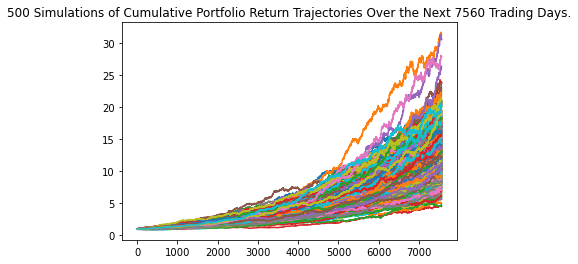

In [98]:

return_plot = simulated_30_years.plot_simulation()
return_plot.get_figure().savefig("simulated_return_plot.png")
plt.tight_layout()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:

return_distribution_plot = simulated_30_years.plot_distribution()
return_distribution_plot.get_figure().savefig('histogram_of_return_distribution.png')
plt.tight_layout()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:

return_summary_table = simulated_30_years.summarize_cumulative_return()

print(return_summary_table)



### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:


ci_lower_thirty_cumulative_return = return_summary_table[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = return_summary_table[9] * total_stocks_bonds



### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
simulated_10_years = MCSimulation(
    portfolio_data = prices_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
simulated_10_years.portfolio_data.head()


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
simulated_10_years.calc_cumulative_return()


In [ ]:
return_plot = simulated_10_years.plot_simulation()
return_plot.get_figure().savefig("simulated_return_plot_10years.png")


In [ ]:
return_distribution = simulated_10_years.plot_distribution()

# Save the plot for future use
return_distribution.get_figure().savefig('simulated_return_distrubtion_10years.png')

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [99]:


summary_table_10_years = simulated_10_years.summarize_cumulative_return()

print(summary_table_10_years)


NameError: name 'simulated_10_years' is not defined

In [ ]:

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = summary_table_10_years[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = summary_table_10_years[9] * total_stocks_bonds


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?